# How to get order of ARIMA models. 
p,d,q shows the order of AR and MA model for Stationary data(seasonal=False)
For seasonal data(seasonal=True) P,D,Q factors do we use.
This document shows : to find the order of p,d,q factors in two cases: 
            seasonal data
            stationary data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load a non-stationary dataset
df1 = pd.read_csv(r'C:/Users/User/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/airline_passengers.csv',index_col='Month',parse_dates=True)
#df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv(r'C:/Users/User/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
#df2.index.freq = 'D'
 

In [2]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [17]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")


In [16]:
!pip install pmdarima

In [18]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


<AxesSubplot:xlabel='Month'>

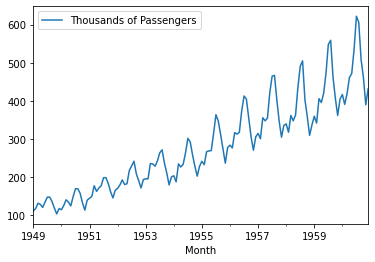

In [5]:
df1.plot()

<AxesSubplot:xlabel='Date'>

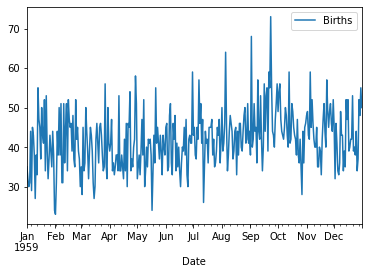

In [6]:
df2.plot()

# check first at Stationary data(Non seasonal case)

In [19]:
df2.columns

Index(['Births'], dtype='object')

In [21]:
auto_arima(df2['Births']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Wed, 19 Jan 2022   AIC                           2459.074
Time:                        19:32:42   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#This shows (p,d,q) components of ARIMA with no seaonal-order components. Let's try with the order 'm' values with 4,12 or for 1 year

In [29]:
stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True) 

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2462.992, Time=0.67 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [30]:
stepwise_fit.summary()
#It takes lower values

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Wed, 19 Jan 2022   AIC                           2459.074
Time:                        19:46:10   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# check for Seasonal data

<AxesSubplot:xlabel='Month'>

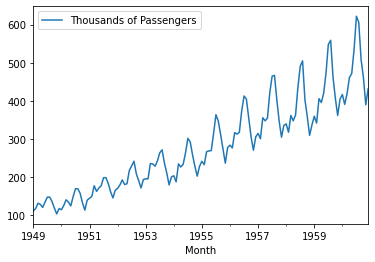

In [31]:
df1.plot()

In [32]:
df1.columns

Index(['Thousands of Passengers'], dtype='object')

In [39]:
stepwise_df1 = auto_arima(df1['Thousands of Passengers'], start_p=0,start_q=0, max_p=3,max_q=3,m=12,seasonal=True,D=1, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.26 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.31 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.24 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.44 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.28 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.50 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.69 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.42 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.15 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.87 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [40]:
print(stepwise_df1.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Thu, 20 Jan 2022   AIC                           1019.178
Time:                                     10:01:47   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      